## Projet réalisé par BESSEPOU Kpatcha Essossimna


### Analyse des données de  HRDataset_v14.csv 

#### L'objectif de cette étude est d'analyser le fichier  HRDataset_v14.csv qui contient des données relatives aux ressources humaines d'une entreprise, comprenant des informations clés sur les employés, leurs performances, les promotions, la satisfaction des employés et d'autres indicateurs de performance clés .

In [3]:
#importons les bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [52]:
# Lecture des données
df=pd.read_csv("HRDataset_v14.csv")

In [53]:
#affichons les premières lignes du jeu de données
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [54]:
df.shape

(311, 36)

#### Nous avons au total, 311 lignes et 36 colonnes ce qui correspond à  311 observations et 36 variables.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

#### Nous remarquons alors notre dataset est constitué de variables numériques et catégorielles.

In [58]:
df.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

#### Dans le DataFrame, seules deux variables présentent des valeurs manquantes : "ManagerID" et "DateofTermination". Il est important de noter que "DateofTermination" a un nombre significativement plus élevé de valeurs manquantes que "ManagerID".

Analysons l'année de naissance

In [56]:
df['DOB'].sample(10)

232    01/12/73
290    10/10/68
34     08/19/77
259    06/14/87
222    11/23/81
212    02/20/79
153    11/10/77
265    03/26/73
228    05/12/80
129    02/16/84
Name: DOB, dtype: object

In [57]:
df["MaritalDesc"][1:10]

1     Married
2     Married
3     Married
4    Divorced
5      Single
6      Single
7     Widowed
8      Single
9    Divorced
Name: MaritalDesc, dtype: object

<AxesSubplot:ylabel='None'>

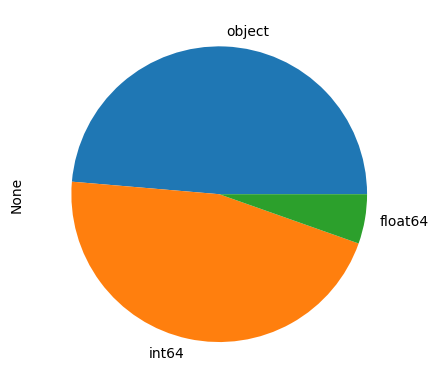

In [99]:

df.dtypes.value_counts().plot.pie()

#### Il y a autant de variables numériques que de variables catégorielles dans le jeu de données.

In [59]:
#Sélectionnons les variables numériques

df_numeric = df.select_dtypes(include=[np.number])
                        

In [60]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_colonnes=df_numeric.columns

In [61]:
for i in numeric_colonnes:
    print(i, df[i].nunique())

EmpID 311
MarriedID 2
MaritalStatusID 5
GenderID 2
EmpStatusID 5
DeptID 6
PerfScoreID 4
FromDiversityJobFairID 2
Salary 308
Termd 2
PositionID 30
Zip 158
ManagerID 23
EngagementSurvey 119
EmpSatisfaction 5
SpecialProjectsCount 9
DaysLateLast30 7
Absences 20


#### Au niveau des variables numériques, nous remarquons que plusieurs sont des variables  variables catégorielles qui  ont été encodées. Nous analyserons plus en détail ces variables dans la suite.

In [104]:
df["MaritalDesc"].value_counts()

Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

#### On a la variable "MaritalDesc" qui est constitué de plusieurs occurences.

In [30]:
df["Zip"].value_counts()

1886    13
1810     7
2045     7
2176     7
2451     7
        ..
2493     1
3062     1
5664     1
2763     1
2067     1
Name: Zip, Length: 158, dtype: int64

In [32]:
df_numeric.shape

(311, 19)

In [62]:
variables_cat = df.select_dtypes(include=['object'])

In [63]:
for i in variables_cat:
    print(i, df[i].nunique())

Employee_Name 311
Position 32
State 28
DOB 307
Sex 2
MaritalDesc 5
CitizenDesc 3
HispanicLatino 4
RaceDesc 6
DateofHire 101
DateofTermination 96
TermReason 18
EmploymentStatus 3
Department 6
ManagerName 21
RecruitmentSource 9
PerformanceScore 4
LastPerformanceReview_Date 137


### Ici nous allons faire une analyse plus minitieuse des variables

In [35]:
df["Sex"].unique()

array(['M ', 'F'], dtype=object)

In [36]:
df["GenderID"].unique()

array([1, 0], dtype=int64)

In [37]:
sex = df['Sex'].value_counts()

for value, count in sex.items():
    print(f"{value}: {count}")

F: 176
M : 135


In [38]:
GenderID= df['GenderID'].value_counts()
for value, count in GenderID.items():
    print(f"{value}: {count}")

0: 176
1: 135


#### Nous remarquons que les colonnes "Sex" et "GenderID" semble être identique, analysons- les.

In [39]:
df["MaritalDesc"].value_counts()

Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

In [40]:
df["MaritalStatusID"].value_counts()

0    137
1    124
2     30
3     12
4      8
Name: MaritalStatusID, dtype: int64

In [41]:
df["MarriedID"].value_counts()

0    187
1    124
Name: MarriedID, dtype: int64

#### Nous notons que sur un total de 311 personnes, 124 sont mariées et les 187 autres sont dans des états civils différents tels que célibataire, divorcé, séparé ou veuf.

#### D'après l'analyse de ces variables nous avons "MaritalStatusID" qui est l'encodage de "MaritalDesc", "GendeID" est celui de "Sex".

In [42]:
df["EmploymentStatus"].unique()

array(['Active', 'Voluntarily Terminated', 'Terminated for Cause'],
      dtype=object)

In [43]:
df['PerformanceScore'].value_counts()

Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: PerformanceScore, dtype: int64

In [44]:
df["PerfScoreID"].value_counts()

3    243
4     37
2     18
1     13
Name: PerfScoreID, dtype: int64

#### Nous en déduisons ainsi que le PerfScoreID est l'encodage correspondant au PerformanceScore.

In [6]:

# Convertissons la colonne 'DOB' en datetime
df['DOB'] = pd.to_datetime(df['DOB'])

# pour extraire l'année
df['Year_Of_Birth'] = df['DOB'].dt.year

# Appliquons la condition pour les années < 2000
df['Year_Of_Birth'] = df['Year_Of_Birth'].apply(lambda x: x )

# Affichons les premières lignes du DataFrame pour vérifier les changements
df.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Year_Of_Birth
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,1983
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,1975
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,1988
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,1988
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,1989


In [65]:
df['DOB'] = pd.to_datetime(df['DOB'])

# Extraire l'année
df['Year_Of_B'] = df['DOB'].dt.year


In [67]:
df.duplicated('EmpID').sum()

0

In [68]:
df.duplicated('Employee_Name').sum()

0

#### On remarque qu'il n y a pas de duplication de données au niveau des employées.

In [69]:
df1=df.copy()

In [70]:
def annees(df):
    #  correspondance entre les colonnes de dates et les nouvelles colonnes d'années
    dates_to_years = {
        "LastPerformanceReview_Date": "LastPerformanceReview_Year",
        "DateofHire": "YearofHire"
    }
    

    for date_column, year_column in dates_to_years.items():
        # Convertissons la colonne de date en année et stockons dans la nouvelle colonne d'année
        df[year_column] = pd.to_datetime(df[date_column]).dt.year
    
    # Supprimons les colonnes de date d'origine
    df.drop(columns=dates_to_years.keys(), inplace=True)

annees(df1)


In [71]:
total = len(df1["Sex"])

sex_total = df1["Sex"].value_counts()

(sex_total / total) * 100


F     56.59164
M     43.40836
Name: Sex, dtype: float64

#### Dans notre base de données, les femmes représentent 56.6% contre 43.4% des hommes

In [72]:
df1.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Year_Of_B,LastPerformanceReview_Year,YearofHire
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,LinkedIn,Exceeds,4.60,5,0,0,1,1983,2019,2011
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Indeed,Fully Meets,4.96,3,6,0,17,1975,2016,2015
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,LinkedIn,Fully Meets,3.02,3,0,0,3,1988,2012,2011
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Indeed,Fully Meets,4.84,5,0,0,15,1988,2019,2008
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Google Search,Fully Meets,5.00,4,0,0,2,1989,2016,2011


In [56]:
df1.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Year_Of_Birth,Year_Of_B,LastPerformanceReview_Year,YearofHire
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,...,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942,2003.993569,2003.993569,2017.569132,2012.688103
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,...,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596,36.745330,36.745330,2.328133,1.956582
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,...,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000,1974.000000,1974.000000,2010.000000,2006.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,...,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000,1981.000000,1981.000000,2016.000000,2011.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,...,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000,1986.000000,1986.000000,2019.000000,2013.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,...,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000,2051.000000,2051.000000,2019.000000,2014.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,...,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000,2073.000000,2073.000000,2019.000000,2018.000000


In [73]:
df1["PerformanceScore"].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [59]:
df1.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'DaysLateLast30', 'Absences', 'Year_Of_Birth', 'Year_Of_B',
       'LastPerformanceReview_Year', 'YearofHire'],
      dtype='object')

In [60]:
df["Department"].value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

In [61]:
df["DeptID"].value_counts()

5    208
3     50
6     32
4     10
1     10
2      1
Name: DeptID, dtype: int64

In [62]:
columns_a_analyser = ['PerformanceScore','EmpSatisfaction','Absences','Sex','MarriedID', 'MaritalDesc','RaceDesc','EmploymentStatus',
                      'TermReason','State',"Department",'SpecialProjectsCount'
                      ,'DaysLateLast30','RecruitmentSource','FromDiversityJobFairID','HispanicLatino','Position']
                      
df3=pd.DataFrame(df1,columns=columns_a_analyser)


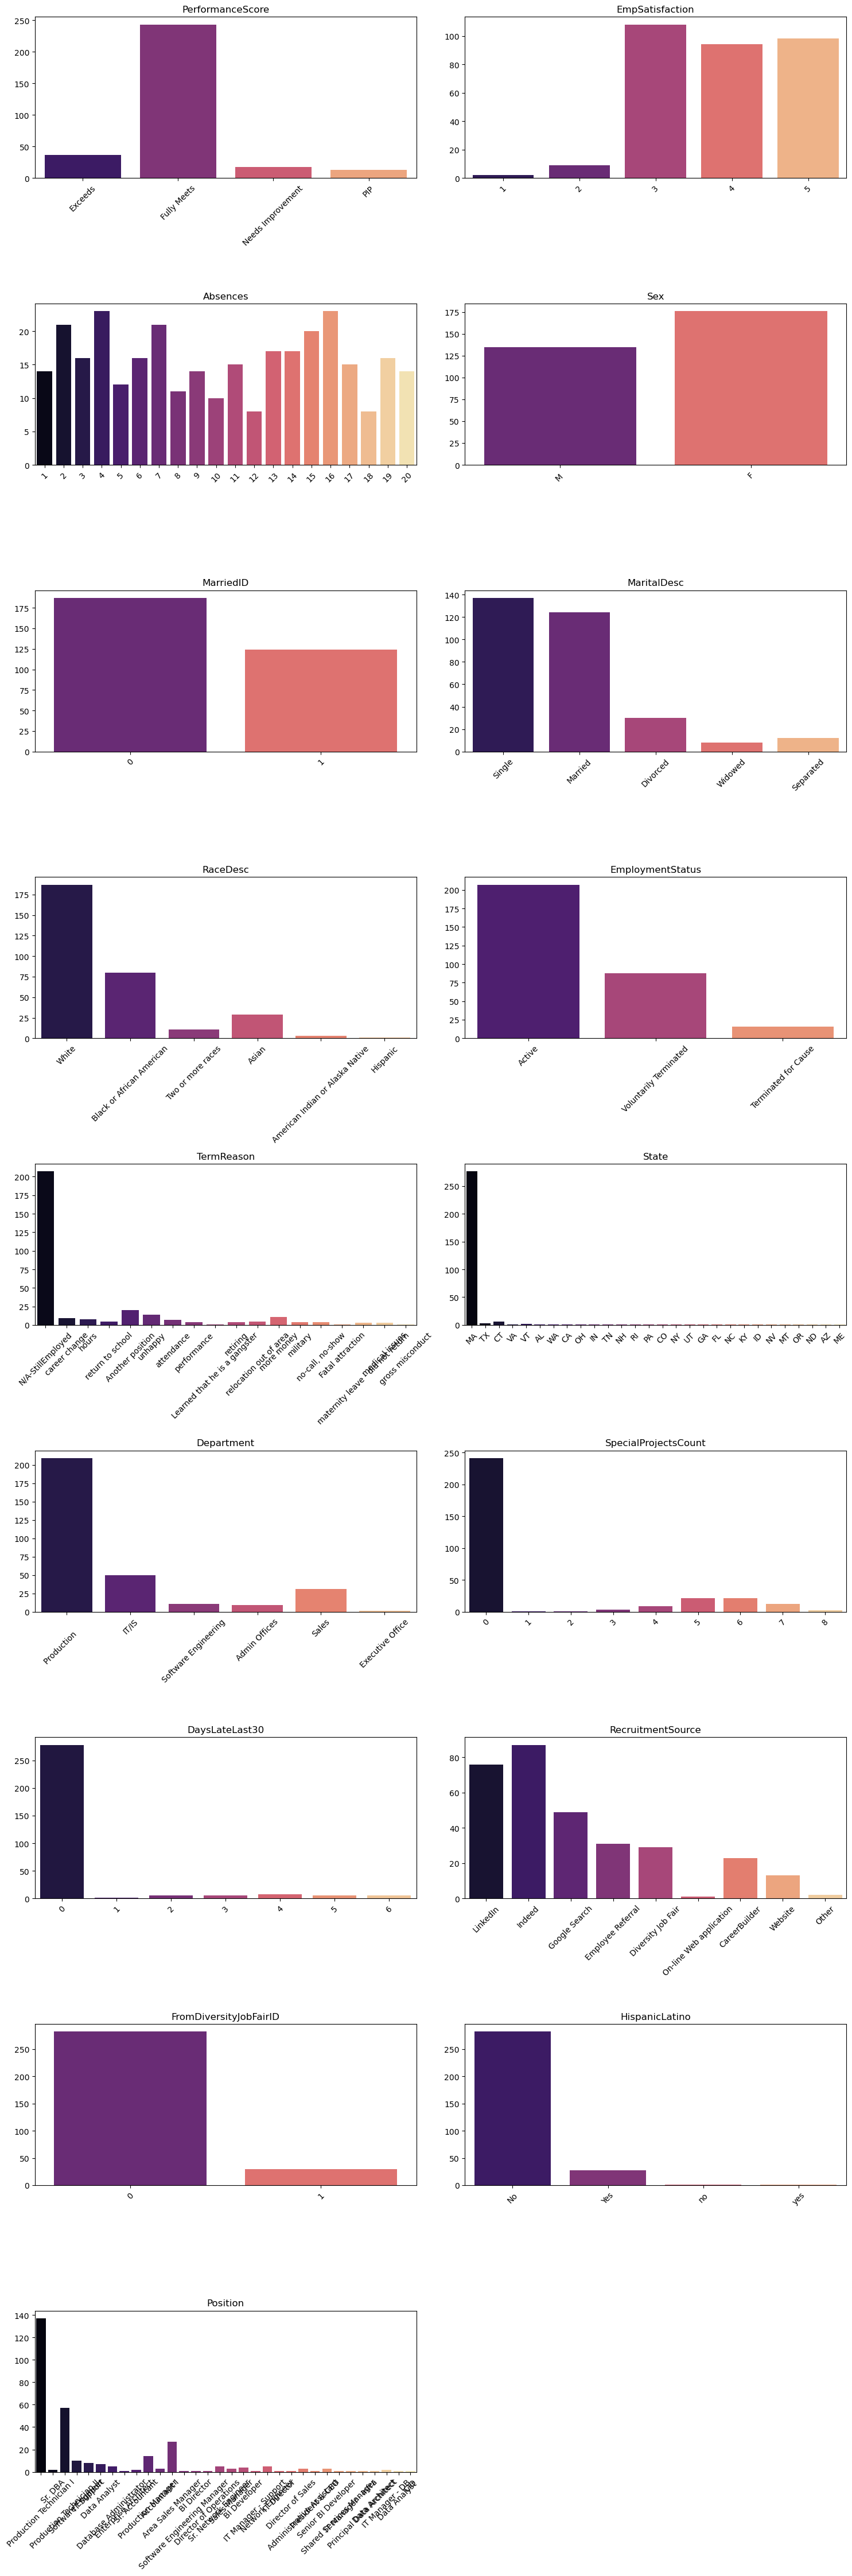

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = len(df3.columns)
num_rows = num_cols // 2 if num_cols % 2 == 0 else num_cols // 2 + 1
plt.figure(figsize=(15, num_rows*5))
for i, column in enumerate(df3.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.countplot(data=df3, x=column, palette='magma')  
    plt.title(column)
    plt.xlabel('')  
    plt.ylabel('')  
    plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


### Analyse des graphiques
Ici, nous détaillerons les significations et conclusions que nous pouvons déduire des différentes variables.

#### Une majorité de femmes est observée parmi les employés, avec une représentation plus élevée que celle des hommes. Sur le plan racial, les employés blancs sont les plus nombreux, suivis par les employés noirs, tandis que les hispaniques constituent une minorité dans l'effectif.La participation à des projets spéciaux est encore peu fréquente parmi les employés, et le nombre de retards sur les 30 derniers jours reste relativement bas.

#### En ce qui concerne le statut d'emploi, la majorité des employés sont toujours actifs au sein de l'entreprise. Parmi ceux qui ont quitté l'entreprise, les raisons varient et incluent des changements de carrière, des ajustements d'horaires, des retours aux études, ainsi que d'autres motifs divers tels que des déménagements, des augmentations de salaire, des questions médicales. 


#### Les évaluations de performance indiquent que la plupart des employés répondent pleinement aux attentes de leur poste, suivis de ceux qui dépassent les attentes. Un nombre minoritaire nécessite une amélioration de leurs performances ou est soumis à un plan d'amélioration des performances (PIP).



#### Les données suggèrent que cette entreprise recrute dans les secteurs de la production, vente et informatique, cela est déduit des différents postes occupés par les employés. La plupart des recrutements ont été réalisés via des plateformes en ligne telles que Indeed, LinkedIn, et Google Search, ainsi que par le biais de références d'employés.

In [64]:
df1["TermReason"].unique()

array(['N/A-StillEmployed', 'career change', 'hours', 'return to school',
       'Another position', 'unhappy', 'attendance', 'performance',
       'Learned that he is a gangster', 'retiring',
       'relocation out of area', 'more money', 'military',
       'no-call, no-show', 'Fatal attraction',
       'maternity leave - did not return', 'medical issues',
       'gross misconduct'], dtype=object)

In [65]:
df1["Department"].value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

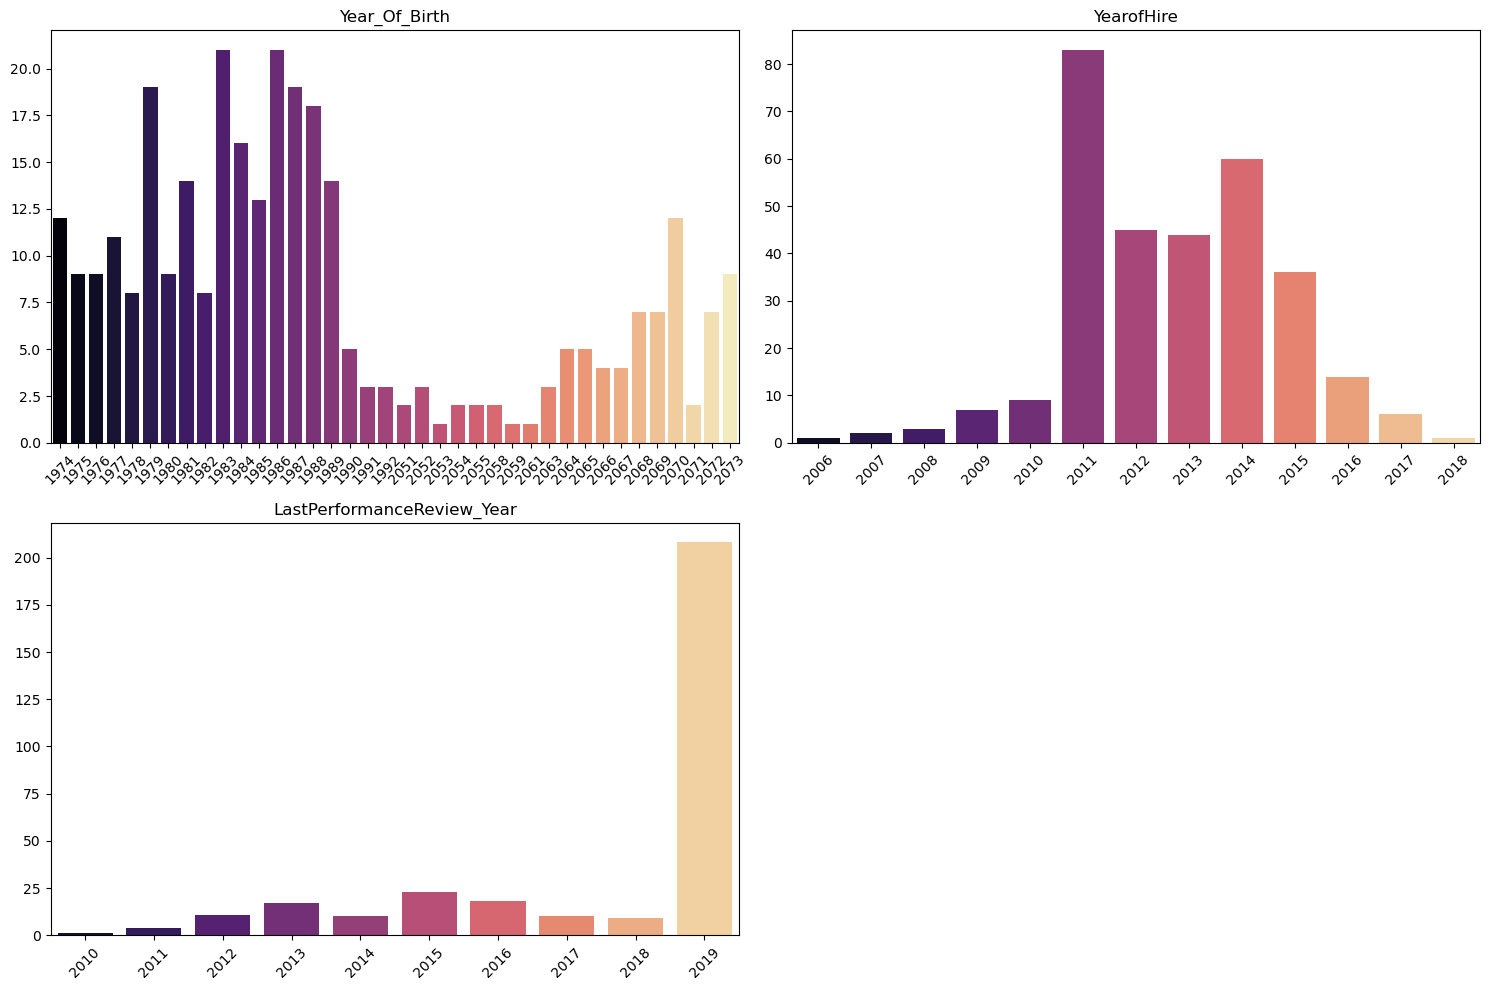

In [66]:
colonnes=['Year_Of_Birth','YearofHire','LastPerformanceReview_Year']
df4=pd.DataFrame(df1,columns=colonnes)
num_cols = len(df4.columns)
num_rows = num_cols // 2 if num_cols % 2 == 0 else num_cols // 2 + 1
plt.figure(figsize=(15, num_rows*5))
for i, column in enumerate(df4.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.countplot(data=df4, x=column, palette='magma')  
    plt.title(column)
    plt.xlabel('')  
    plt.ylabel('')  
    plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

#### On remarque une augmentation significative du nombre d'employés est observée entre les années 2011 et 2014, avec un pic enregistré en 2011, suivi de près par l'année 2014. De plus, il est remarquable que la majorité des employés sont nés entre 1978 et 1989.

In [67]:
df1.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'DaysLateLast30', 'Absences', 'Year_Of_Birth', 'Year_Of_B',
       'LastPerformanceReview_Year', 'YearofHire'],
      dtype='object')

In [68]:
df1["PositionID"].value_counts()

19    137
20     57
3      27
18     13
24      9
14      8
9       8
15      5
28      5
8       5
4       4
13      4
22      3
2       3
1       3
21      3
23      2
26      2
27      2
10      1
12      1
11      1
5       1
16      1
25      1
30      1
29      1
7       1
17      1
6       1
Name: PositionID, dtype: int64

In [106]:
len(df1["PositionID"])

311

In [69]:
df1["Position"].value_counts()

Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. DBA                           2
IT Manager - DB                   2
Sr. Accountant                    2
Director of Operations            1
Shared Services Manager           1
Data Analyst                      1
Data Architect                    1
Principal Data Architect          1
IT Manager - Infra                1
President & CEO                   1
Enterprise Architect              1
BI Director                       1
Director of Sales           

In [70]:
df1["Salary"]

0       62506
1      104437
2       64955
3       64991
4       50825
        ...  
306     65893
307     48513
308    220450
309     89292
310     45046
Name: Salary, Length: 311, dtype: int64

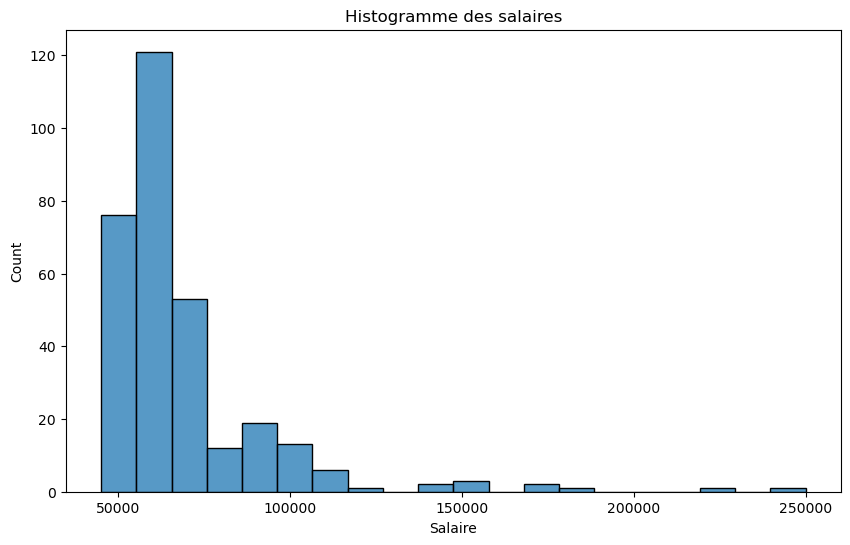

In [71]:
# Création de l'histogramme
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x="Salary", bins=20, kde=False)

# Ajout des titres et étiquettes
plt.title('Histogramme des salaires')
plt.xlabel('Salaire')
plt.ylabel('Count')

# Affichage du graphique
plt.show()

#### Les salaires des employés sont majoritairement compris entre 50 000 et 100 000 dollars américains par an, avec un maximum de 250 000 dollars par an.

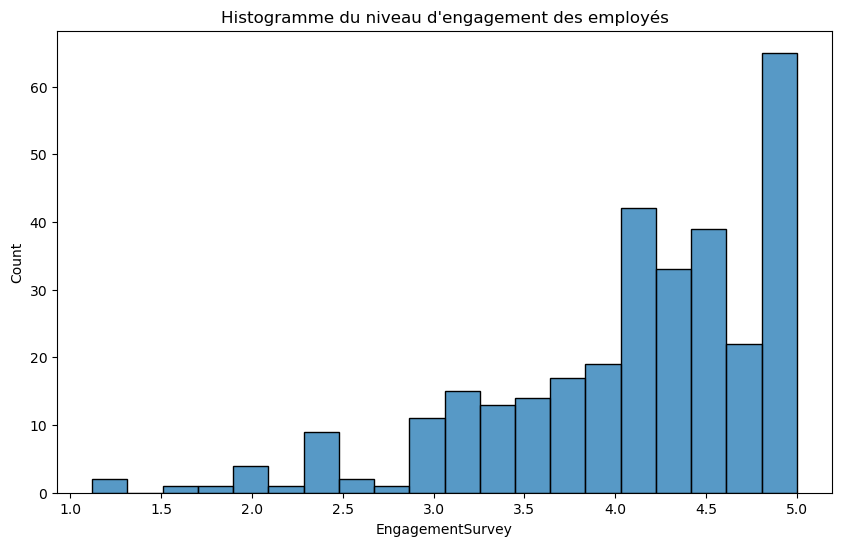

In [72]:
df1["EngagementSurvey"]
# Création de l'histogramme
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x="EngagementSurvey", bins=20, kde=False)

# Ajout des titres et étiquettes
plt.title("Histogramme du niveau d'engagement des employés")
plt.xlabel('EngagementSurvey')
plt.ylabel('Count')

# Affichage du graphique
plt.show()

#### Nous remarquons que le niveau d'engagement reste élevé pour la majorité des employés, ce qui signifie que les employés contribuent bien au succès de l'entreprise.

In [129]:
df['Termd'].value_counts()

0    207
1    104
Name: Termd, dtype: int64

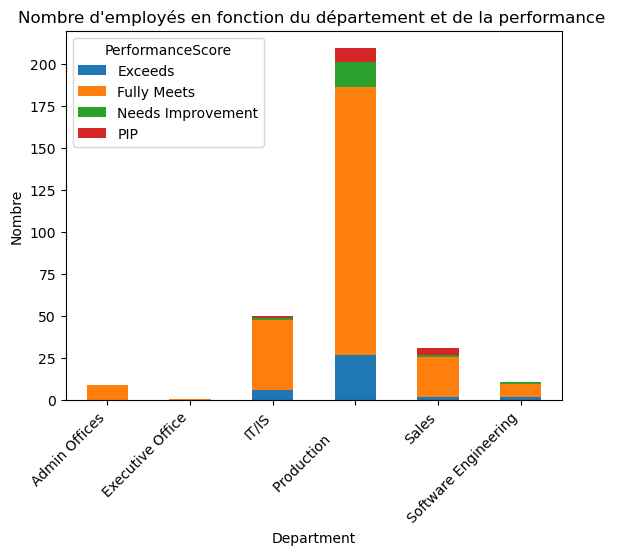

In [89]:

# Comptons le nombre d'occurrences de chaque combinaison de Department et PerformanceScore
Nombre= df.groupby(['Department', 'PerformanceScore']).size().unstack()

counts.plot(kind='bar', stacked=True)
plt.xlabel('Department')  
plt.ylabel('Nombre')  
plt.title("Nombre d'employés en fonction du département et de la performance ")  
plt.legend(title='PerformanceScore')  # Légende du graphique
plt.xticks(rotation=45, ha='right')
plt.show()  

#### Nous constatons que les membres des départements administratifs et exécutif démontrent une performance qui correspond parfaitement à leurs postes respectifs.Mais ceux des départements des ventes, de la production et certains du département IT/IS nécessitent une amélioration de leurs performances. Certains membres des départements de production,de  IT/IS,de ventes et software engineering se démarquent particulièrement en terme de performance.

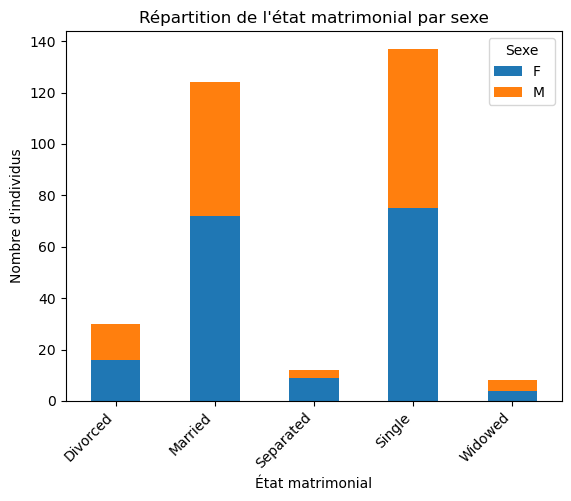

In [14]:
import matplotlib.pyplot as plt

# Comptons le nombre d'occurrences 
nombre = df1.groupby(['MaritalDesc', 'Sex']).size().unstack()

ax = nombre.plot(kind='bar', stacked=True)
plt.title('Répartition de l\'état matrimonial par sexe')
plt.xlabel('État matrimonial')
plt.ylabel('Nombre d\'individus')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Sexe')
plt.show()




#### Étant donné que notre ensemble de données compte plus d'hommes que de femmes, il en résulte que le taux de célibataires et de personnes mariées est réparti presque de manière équitable entre les sexes.Cependant, il y a plus de veufs que de veuves, et les femmes sont plus souvent séparées de leurs conjoints que les hommes.

In [153]:
df["Sex"].value_counts()

F     176
M     135
Name: Sex, dtype: int64

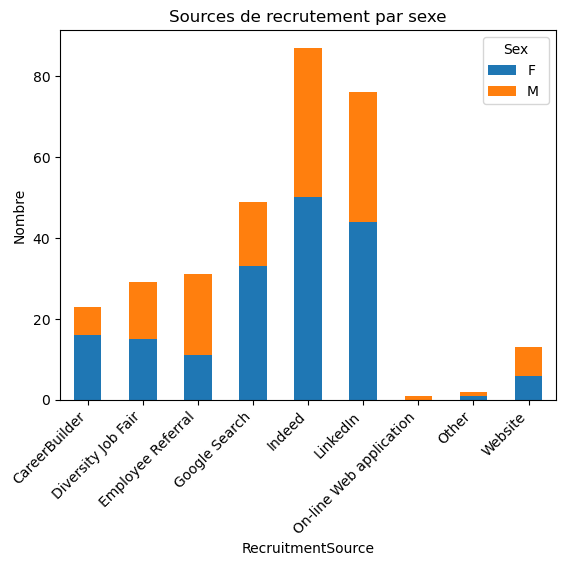

In [110]:

# Comptons le nombre d'occurrences de chaque combinaison de RecruitmentSource et Sex
nombre = df.groupby(['RecruitmentSource', 'Sex']).size().unstack()

# Traçonsle graphique
ax = counts.plot(kind='bar', stacked=True)
plt.title('Sources de recrutement par sexe')
plt.xlabel('RecruitmentSource')
plt.ylabel('Nombre')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Sex')
plt.show()


#### Les données révèlent que les femmes sont principalement recrutées via des plateformes telles que Google Search, LinkedIn et Indeed, tandis que la majorité des employés recrutés par le biais de références d'employés de l'entreprise sont des hommes.

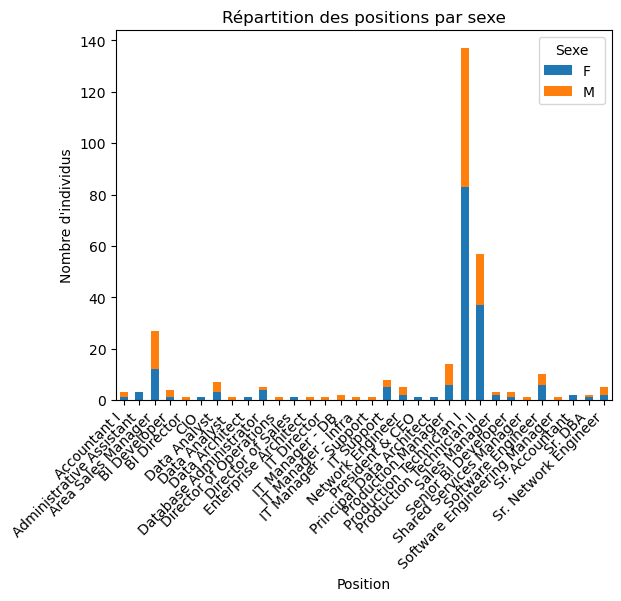

In [112]:
# Comptons le nombre d'occurrences de chaque par "Position" et "Sex"
nombre = df.groupby(['Position', 'Sex']).size().unstack()

fig, ax = plt.subplots()
counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Répartition des positions par sexe')
plt.xlabel('Position')
plt.ylabel('Nombre d\'individus')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Sexe')
plt.show()

#### Les femmes sont nettement plus représentées dans des postes tels que technicienne de production, IT support, database administrator, sale Manager, director of Sales, assistantes administratives, ainsi que directrices et présidente. En revanche, les hommes occupent principalement des postes de data analyst, enterprise architect, business intelligence, software engineer, et occupent surtout des fonctions de directeur et de manager dans le domaine des services informatiques.

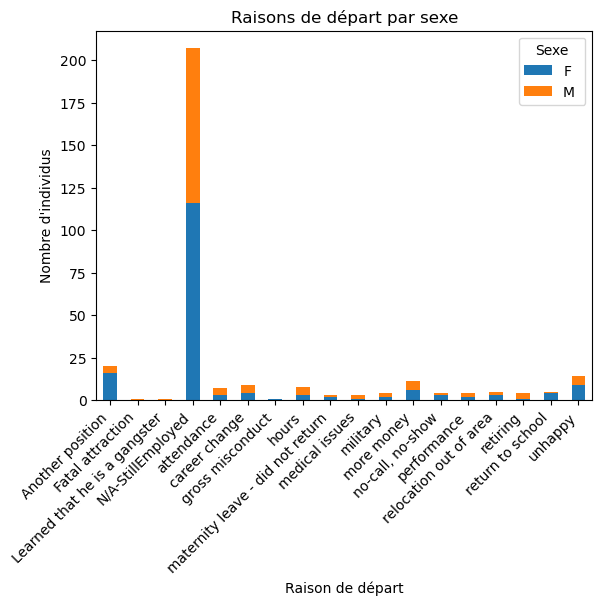

In [113]:

counts = df.groupby(['TermReason', 'Sex']).size().unstack()

fig, ax = plt.subplots()
counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Raisons de départ par sexe')
plt.xlabel('Raison de départ')
plt.ylabel('Nombre d\'individus')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Sexe')
plt.show()


#### La tendance observée révèle que les hommes ont principalement quitté leur emploi pour diverses raisons telles que le changement de carrière, la retraite, l'implication dans des activités criminelles, des performances insuffisantes ou des problèmes de santé. En revanche, du côté des femmes, les raisons de départ ont été principalement un manque de satisfaction au travail, des changements de poste, la poursuite d'études, des congés maternité suivis de démission, ainsi que des départs non explicites. Par ailleurs, il est intéressant de noter une égalité presque parfaite entre les sexes en ce qui concerne les départs pour des raisons de changement de zone et de recherche de salaire plus élevé.

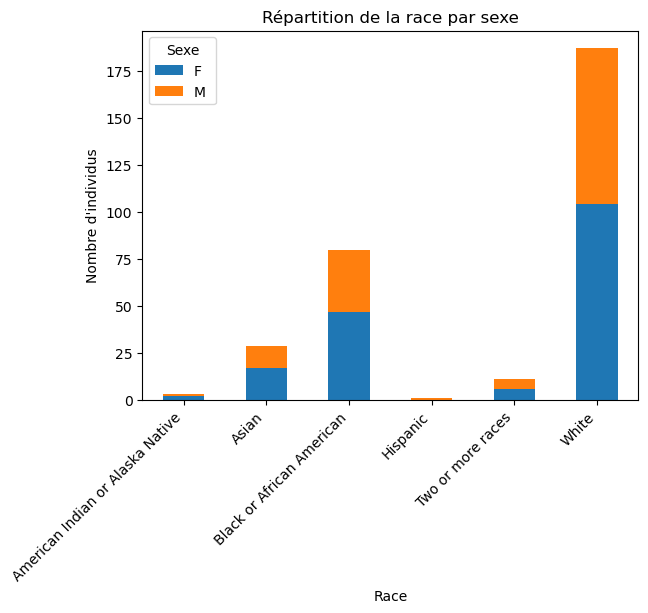

In [115]:

counts = df.groupby(['RaceDesc', 'Sex']).size().unstack()

fig, ax = plt.subplots()
counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Répartition de la race par sexe')
plt.xlabel('Race')
plt.ylabel('Nombre d\'individus')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Sexe')
plt.show()


#### Le nombre de femmes étant supérieur à celui des hommes dans nos données, il est observé que la répartition des races ne dépend pas du sexe, avec une représentation presque équilibrée des hommes et des femmes dans toutes les races, à l'exception des hispaniques où on a seulement des hommes.


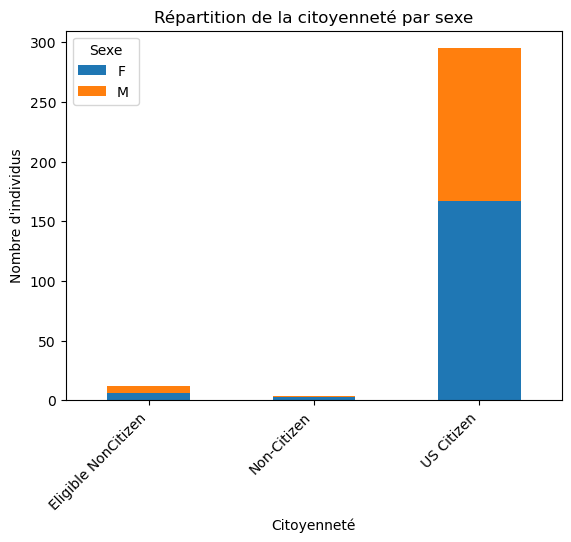

In [116]:

counts = df.groupby(['CitizenDesc', 'Sex']).size().unstack()


fig, ax = plt.subplots()
counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Répartition de la citoyenneté par sexe')
plt.xlabel('Citoyenneté')
plt.ylabel('Nombre d\'individus')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Sexe')
plt.show()


##### Nous observons une prédominance de la citoyenneté américaine au sein de l'effectif de l'entreprise, avec une répartition presque équitable selon le sexe, à l'exception des citoyens non américains, majoritairement représentés par des femmes.

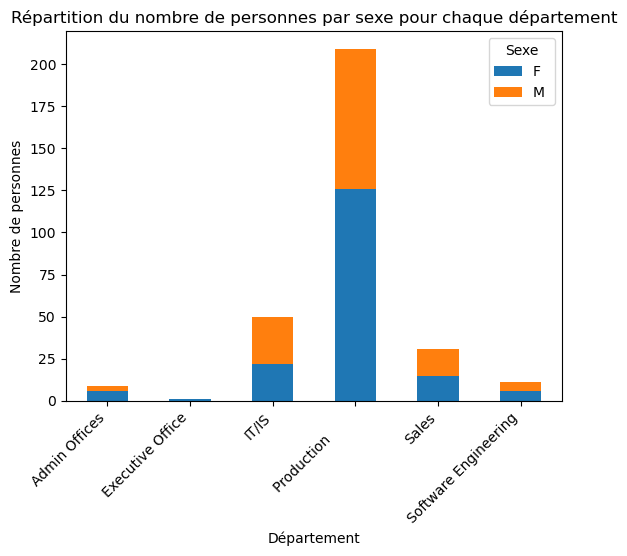

In [117]:

counts = df.groupby(['Department', 'Sex']).size().unstack()

fig, ax = plt.subplots()
counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Répartition du nombre de personnes par sexe pour chaque département')
plt.xlabel('Département')
plt.ylabel('Nombre de personnes')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Sexe')
plt.show()


#### Les femmes sont plus présentes dans les départements de la production, des services administratifs et des postes exécutifs, tandis que les hommes gèrent majoritairement les départements liés aux technologies de l'information et aux systèmes d'information. De plus, les hommes sont légèrement plus représentés dans le département des ventes que les femmes.

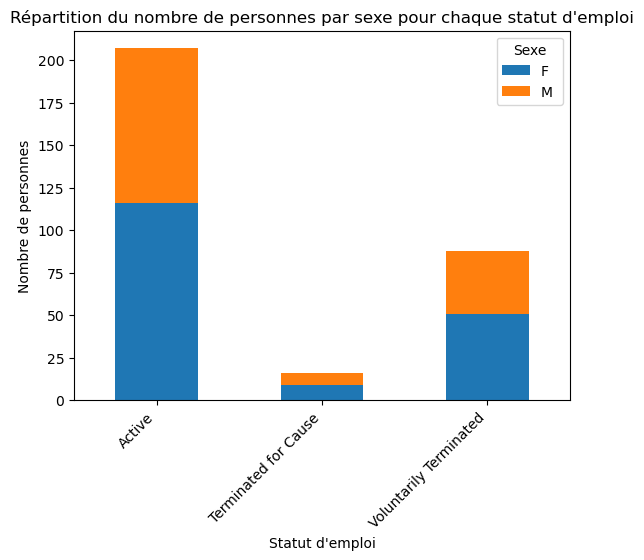

In [118]:

counts = df.groupby(['EmploymentStatus', 'Sex']).size().unstack()

fig, ax = plt.subplots()
counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Répartition du nombre de personnes par sexe pour chaque statut d\'emploi')
plt.xlabel('Statut d\'emploi')
plt.ylabel('Nombre de personnes')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Sexe')
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14304\3083865595.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



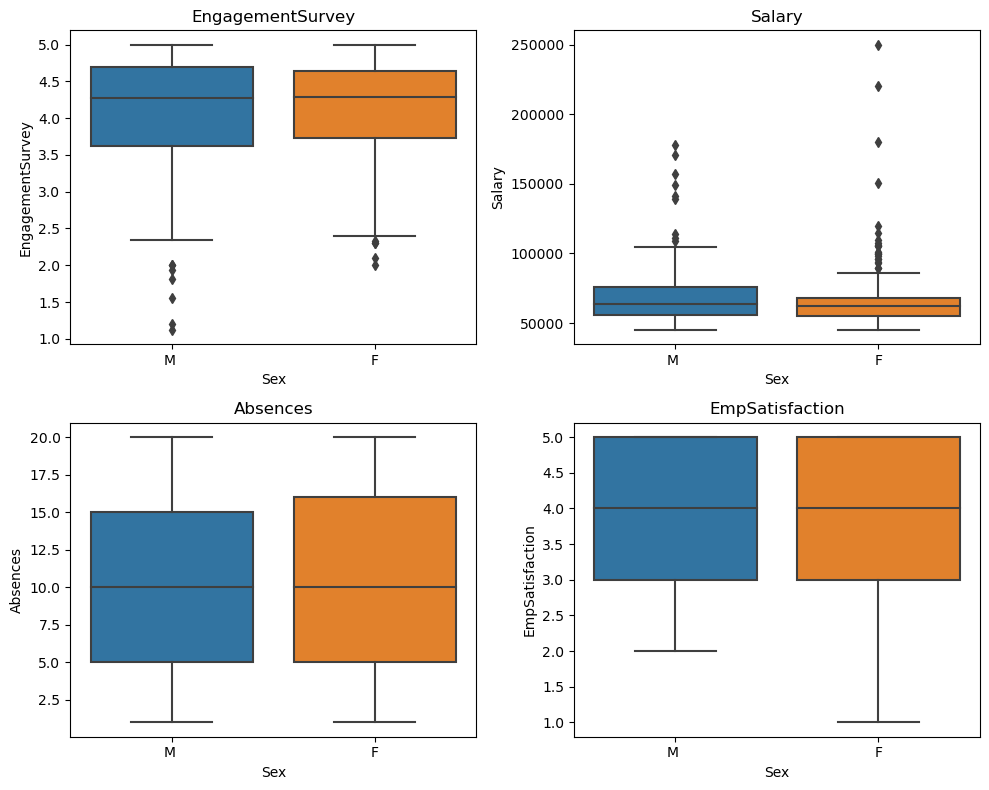

In [18]:
import seaborn as sns
df5= df[["EngagementSurvey", "Salary", "Absences", "EmpSatisfaction"]]

# Ajoutons de la variable de sexe aux données numériques
df5['Sex'] = df['Sex']  

# Création des boxplots pour chaque colonne numérique
num_cols = len(df5.columns) - 1  # ici, nous avons exclu la variable 'Sex'

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df5.columns.drop('Sex'), start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='Sex', y=column, data=df5)
    plt.title(column)

plt.tight_layout()
plt.show()


#### On observe que les hommes semblent être légèrement plus engagés, mais également plus présents parmi les valeurs aberrantes indiquant un faible niveau d'engagement. Cela suggère que les individus avec une contribution médiocre sont principalement des hommes. En revanche, la satisfaction reste similaire entre les deux sexes. Par ailleurs, les femmes semblent avoir un nombre d'absences légèrement supérieur à celui des hommes. De plus, la fourchette de salaire des femmes est plus limitée que celle des hommes. Mais les plus gros salaires sont également touchés par les femmes ceci s'explique bien par le fait qu'elles occupent les postes significatives  de directices et CEO.

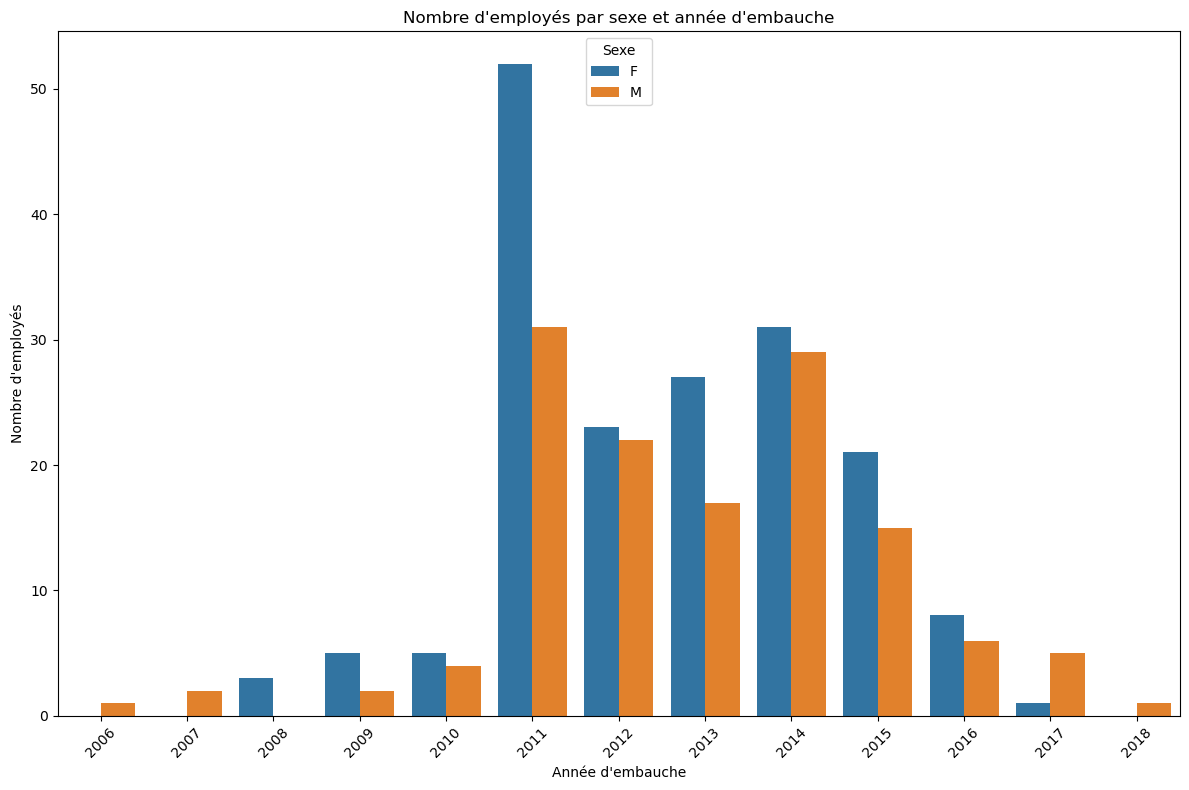

In [183]:
# Groupons les données par 'Sex' et 'YearofHire', puis comptons le nombre d'employés pour chaque groupe crée
employee_count = df1.groupby(['Sex', 'YearofHire']).size().reset_index(name='nombre')

# Créons le graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(data=employee_count, x='YearofHire', y='nombre', hue='Sex')

plt.title('Nombre d\'employés par sexe et année d\'embauche')
plt.xlabel('Année d\'embauche')
plt.ylabel('Nombre d\'employés')

# Affichons la légende
plt.legend(title='Sexe')
plt.xticks(rotation=45)

# Affichons le graphique
plt.tight_layout()

#### Nous avons remarqué quelque chose d'intéressant dans les processus d'embauche de l'entreprise : bien que les femmes représentent une part importante de l'équipe selon nos données (56.59% femmes contre 43.41% hommes), au début et récemment, l'entreprise a principalement recruté des hommes. Cependant, entre 2007 et 2011, il y a eu soudainement une augmentation significative du nombre de femmes embauchées. Nous nous demandons alors si cela visait à équilibrer le nombre d'hommes et de femmes dans l'entreprise, ou si c'était simplement dû aux besoins opérationnels de l'entreprise. Pour répondre à cette question, nous devrons examiner d'autres informations. De plus, entre 2017 et 2019, l'entreprise a de nouveau embauché plus d'hommes.

In [12]:
# Calculons le nombre total d'hommes et de femmes par département
total_departement = df.groupby(['Department', 'Sex']).size().unstack()

# Calcul des pourcentages pour chaque département
pourcentage =total_departement.div(total_departement.sum(axis=1), axis=0) * 100
pourcentage = pourcentage.reset_index()

pourcentage


Sex,Department,F,M
0,Admin Offices,66.666667,33.333333
1,Executive Office,100.000000,NaN
2,IT/IS,44.000000,56.000000
3,Production,60.287081,39.712919
4,Sales,48.387097,51.612903
5,Software Engineering,54.545455,45.454545


#### Cette analyse confirme nos observations antérieures selon lesquelles les femmes occupent principalement des postes dans la production, les bureaux exécutifs, les bureaux administratifs, y compris des postes de direction, tandis que les hommes sont plus présents dans les autres départements.

In [13]:
# Regroupons les données par département et position, puis comptons le nombre d'occurrences
position_par_department = df.groupby(['Department', 'Position']).size().unstack(fill_value=0)

# Affichons la répartition des positions par département
position_par_department

Position,Accountant I,Administrative Assistant,Area Sales Manager,BI Developer,BI Director,CIO,Data Analyst,Data Analyst,Data Architect,Database Administrator,...,Production Technician I,Production Technician II,Sales Manager,Senior BI Developer,Shared Services Manager,Software Engineer,Software Engineering Manager,Sr. Accountant,Sr. DBA,Sr. Network Engineer
Department,,,,,,,,,,,,,,,,,,,,,
Admin Offices,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,0,0
Executive Office,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IT/IS,0,0,0,4,1,1,7,1,1,5,...,0,0,0,3,0,0,0,0,2,5
Production,0,0,0,0,0,0,0,0,0,0,...,137,57,0,0,0,0,0,0,0,0
Sales,0,0,27,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
Software Engineering,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,1,0,0,0


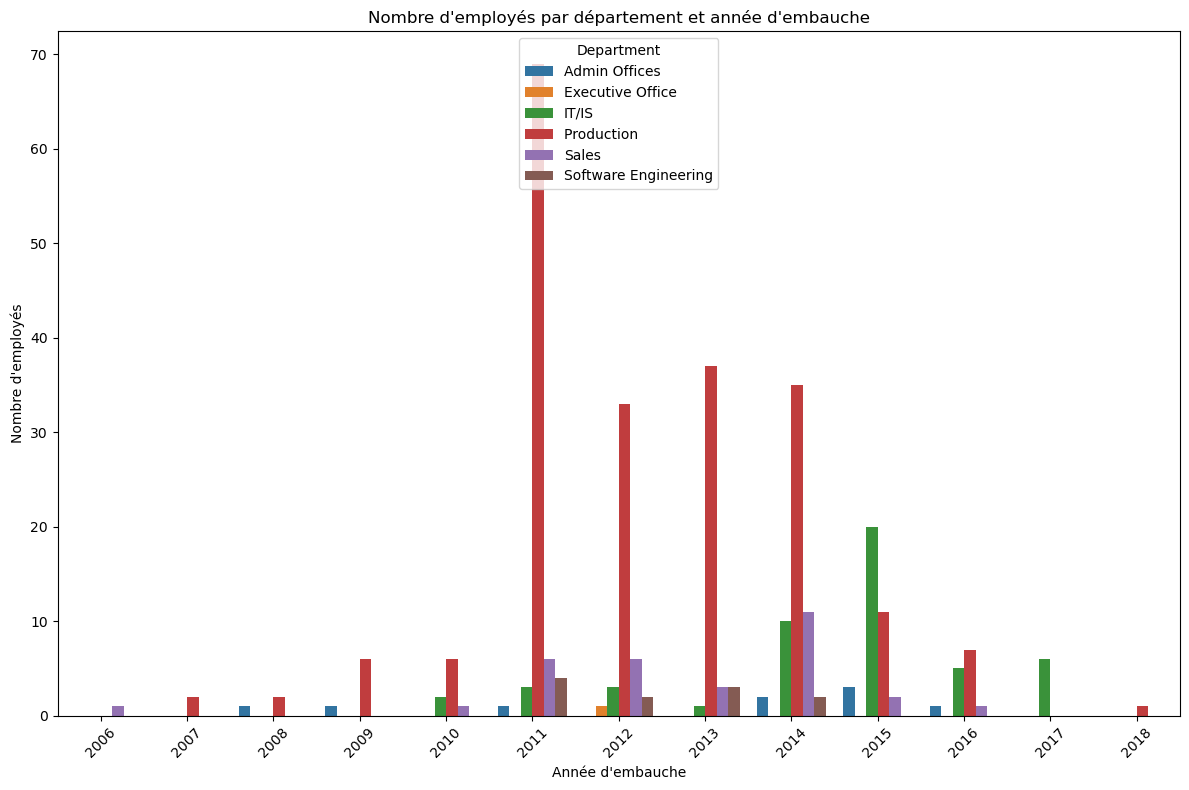

In [119]:
# Groupons les données par 'Department' et 'YearofHire', puis comptons le nombre d'employés dans chaque groupe
employees = df1.groupby([ 'Department','YearofHire']).size().reset_index(name='nombre')

plt.figure(figsize=(12, 8))
sns.barplot(data=employees, x='YearofHire', y='nombre', hue='Department')

# Ajoutons un titre et des étiquettes aux axes
plt.title('Nombre d\'employés par département et année d\'embauche')
plt.xlabel('Année d\'embauche')
plt.ylabel('Nombre d\'employés')

# Affichage la légende
plt.legend(title='Department')
plt.xticks(rotation=45)
plt.tight_layout()

#### À la lumière de ce graphique, nous tirons des conclusions intéressantes. En effet, cette entreprise a en effet commencé dans la vente en 2006 et à vu la nécessité de se lancer dans la production en 2007, probablement en réponse à la demande croissante ou dans le but de réduire les coûts d'approvisionnement. Cette transition s'est accompagnée d'un recrutement croissant dans le département de la production.

#### Entre 2007 et 2009, des recrutements massifs ont été observés dans les bureaux administratifs. Ensuite, l'entreprise a pris conscience de la nécessité de moderniser ses systèmes, d'où les recrutements dans les départements des technologies de l'information IT/IS à partir de 2009 et du Softwsare Engineering  à partir de 2011.
#### L'augmentation significative des recrutements dans le département de l'IT notamment pour  les postes  de  data analysts,      d'ingénieurs en BI entre 2014 et 2017 signifie que l'entreprise reconnaissait l'importance d'analyser ses données pour accroître  ses revenus et prendre des décisions plus  significatives.


#### En revenant sur la question du genre, comme mentionné précédemment, nous remarquons qu'entre 2007 et 2011, l'entreprise a effectué un grand nombre de recrutements pour des postes administratifs et de production, qui sont principalement occupés par des femmes, ce qui confirme nos analyses antérieures. De plus, le recrutement prédominant d'hommes en 2006 confirme nos conclusions selon lesquelles les hommes sont plus présents dans les ventes. En 2017, les nouveaux recrutements sont principalement dirigés vers le département de l'IT/IS, qui, dans notre ensemble de données, est majoritairement occupé par des hommes. En conclusion, l'entreprise recrute  en fonction de ses besoins spécifiques.

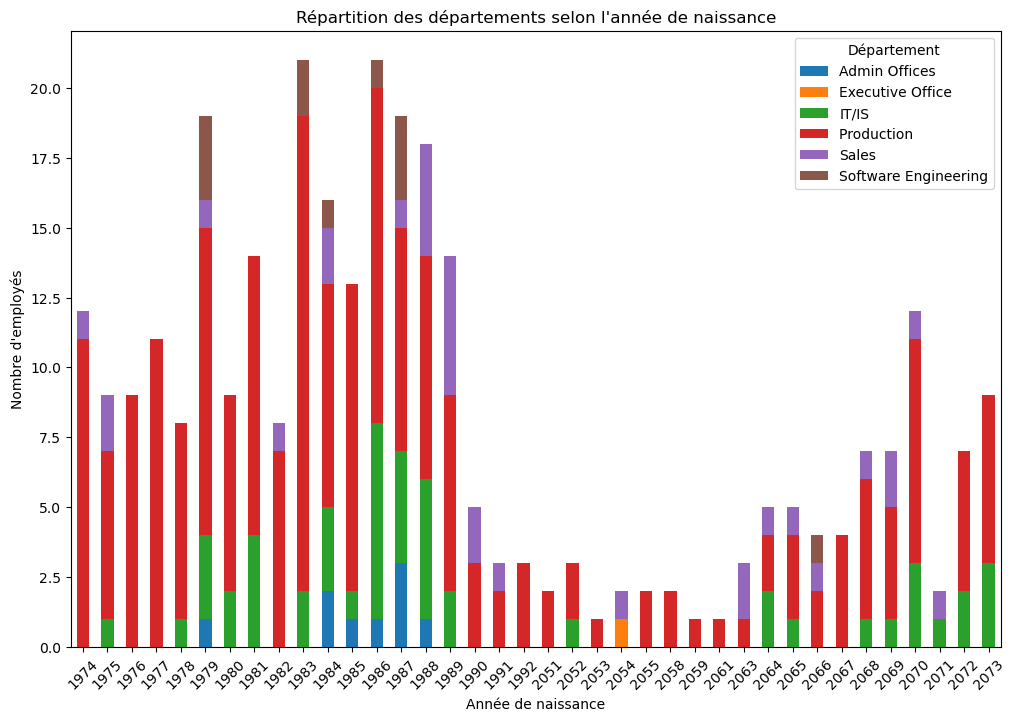

In [16]:
# Création d'un DataFrame pivot pour compter le nombre d'employés par département et par année de naissance
pivot_df = df.pivot_table(index='Year_Of_Birth', columns='Department', aggfunc='size', fill_value=0)

# Création du diagramme en barres empilées
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Répartition des départements selon l\'année de naissance')
plt.xlabel('Année de naissance')
plt.ylabel('Nombre d\'employés')

# Affichage du graphique
plt.legend(title='Département')
plt.xticks(rotation=45)
plt.show()

#### Les plus jeunes semblent être principalement affectés aux départements de production et de vente, les postes de direction au sein des services administratifs sont majoritairement occupés par des  jeunes. Les membres du département IT/IS, de la production et des ventes semblent être dans une tranche d'âge intermédiaire. La majeur partie de ceux qui sont âgés proviennent du département de production.

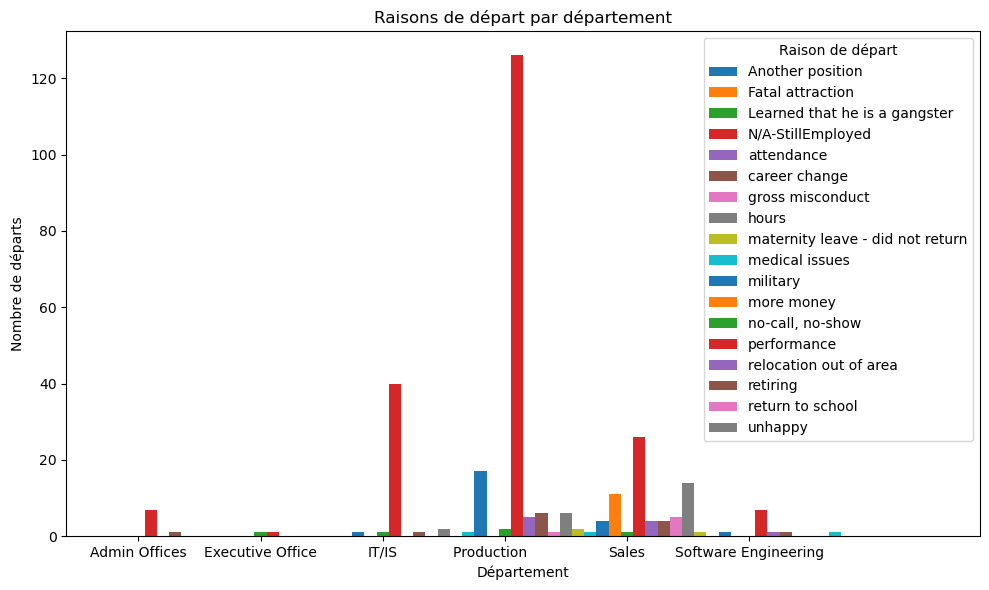

In [21]:

# Récupérons les données de département
departments = df_pivot['Department']
reasons = df_pivot.columns[1:]
values = df_pivot.values[:, 1:].T

plt.figure(figsize=(10, 6))

# Boucle sur chaque raison de départ
for i, reason in enumerate(reasons):
    plt.bar(np.arange(len(departments)) + i * 0.1, values[i], width=0.1, label=reason)

plt.title('Raisons de départ par département')
plt.xlabel('Département')
plt.ylabel('Nombre de départs')
plt.xticks(np.arange(len(departments)) + 0.2, departments)
plt.legend(title='Raison de départ')
plt.tight_layout()

plt.show()


#### Dans certains départements comme l'Administration et l'Exécutif, les employés restent généralement, ce qui indique probablement qu'ils sont satisfaits de leur travail. En revanche, dans la production, les gens partent souvent à cause des horaires, du mal-être ou pour retourner à l'école ou à l'armée, ou encore pour gagner plus d'argent ailleurs. Dans la vente, beaucoup partent pour trouver un autre job. Pour les Software engineering, c'est souvent aussi pour une autre opportunité ou pour des problèmes de santé. Quant à l'IT/IS, certains partent pour des raisons comme des problèmes de santé ou encore pour chercher mieux ailleurs, de performance et qu'on aurait su que certains sont des gangsters .

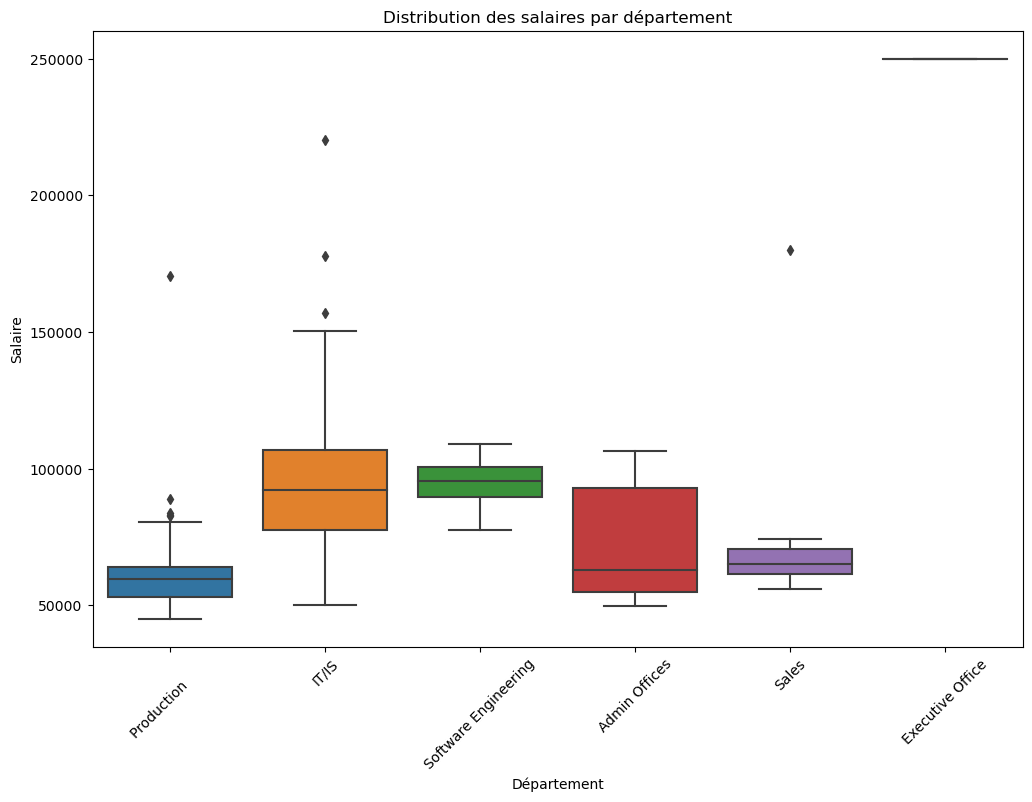

In [131]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Distribution des salaires par département')
plt.xlabel('Département')
plt.ylabel('Salaire')
plt.xticks(rotation=45) 
plt.show()

In [173]:
df["Department"].value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

#### Malgré le nombre important de personnes en production, c'est eux qui ont le salaire les plus bas, ceux du bureau excécutif sont les mieux payés avec 250000 dollars l'année, les admins offices ont une fourchette de salaire plus grande suvi des IT/IS.

In [20]:
df1['ManagerID'].value_counts()

18.0    22
20.0    22
16.0    22
12.0    22
19.0    21
14.0    21
22.0    21
11.0    21
2.0     19
4.0     17
7.0     14
17.0    14
39.0    13
21.0    13
10.0     9
13.0     8
5.0      7
1.0      6
6.0      4
15.0     3
9.0      2
3.0      1
30.0     1
Name: ManagerID, dtype: int64

In [21]:
df1["ManagerName"].value_counts()

Michael Albert        22
Kissy Sullivan        22
Elijiah Gray          22
Kelley Spirea         22
Brannon Miller        22
Ketsia Liebig         21
David Stanley         21
Amy Dunn              21
Webster Butler        21
Janet King            19
Simon Roup            17
Peter Monroe          14
John Smith            14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Brandon R. LeBlanc     7
Jennifer Zamora        7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: ManagerName, dtype: int64

#### Les managers sont dupliqués dans notre dataset, analysons mieux cette variable.

In [132]:
# Comptons le nombre de ManagerID par département
manager_nombre = df.groupby('Department')['ManagerID'].nunique()

# Affichons les résultats
print(manager_nombre)


Department
Admin Offices            4
Executive Office         1
IT/IS                    6
Production              11
Sales                    4
Software Engineering     3
Name: ManagerID, dtype: int64


#### Le nombre de Managers est réparti par département, celui de la production disposant du plus grand nombre et ensuite vient celui de IT/IS, cela est bien normal car les employés y sont plus nombreux dans ses départements.

In [133]:
perf_satisfaction=df.groupby('PerformanceScore')['EmpSatisfaction'].mean().reset_index()
perf_satisfaction

,PerformanceScore,EmpSatisfaction
0,Exceeds,4.108108
1,Fully Meets,3.950617
2,Needs Improvement,3.611111
3,PIP,2.538462


#### On remarque que les employés qui sont satisfaits de leur travail ont de bonne performance.

In [134]:
df.groupby('Department')['EmpSatisfaction'].mean().reset_index()

,Department,EmpSatisfaction
0,Admin Offices,3.555556
1,Executive Office,3.000000
2,IT/IS,3.960000
3,Production,3.861244
4,Sales,4.032258
5,Software Engineering,4.090909


#### Les départements de l'informatique sont plus satisfaits de leur travail, ceux qui le sont moins proviennent du département administratif et excécutif. Ceci pourrait être traduit par la volonté des chefs de voir leurs équipes plus performant et de vouloir qu'ils travaillent mieux.

In [135]:
df.groupby('Sex')['EmpSatisfaction'].mean().reset_index()

,Sex,EmpSatisfaction
0,F,3.926136
1,M,3.844444


#### Les femmes sont un peu  plus satisfaites de leur travail

In [139]:
df.groupby('Sex')['Absences'].mean().reset_index()

,Sex,Absences
0,F,10.261364
1,M,10.207407


#### Vu que le nombre de femmes est un peu supérieur au nombre d'hommes dans notre dataset, nous pouvons dire que l'absence ne dépend pas du genre vu le résultat ci-dessus.

In [141]:

df.groupby('MaritalDesc')['Absences'].mean().reset_index()

,MaritalDesc,Absences
0,Divorced,10.000000
1,Married,10.927419
2,Separated,8.583333
3,Single,9.773723
4,Widowed,10.875000


Text(0, 0.5, 'Salaire')

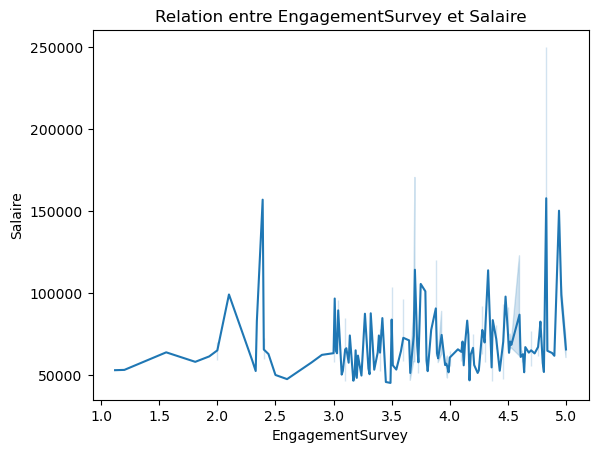

In [143]:
sns.lineplot(x="EngagementSurvey", y="Salary", data=df)

plt.title('Relation entre EngagementSurvey et Salaire')
plt.xlabel('EngagementSurvey')
plt.ylabel('Salaire')



#### Nous remarquons que malgré que certains ont un bon salaire, environ 170000 dollars/an, ils ne sont pas autant engagés.

Text(0, 0.5, 'Salaire')

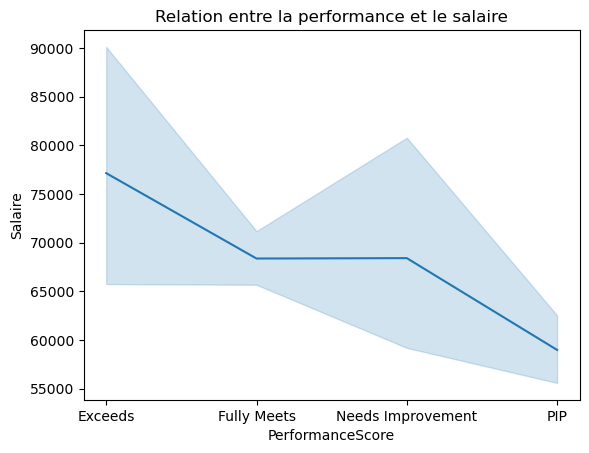

In [24]:
import seaborn as sns
sns.lineplot(x="PerformanceScore", y="Salary", data=df)

plt.title('Relation entre la performance et le salaire')
plt.xlabel('PerformanceScore')
plt.ylabel('Salaire')



#### On remarque bien généralement  que ceux qui travaillent bien ont plus de salaire de que les autres.

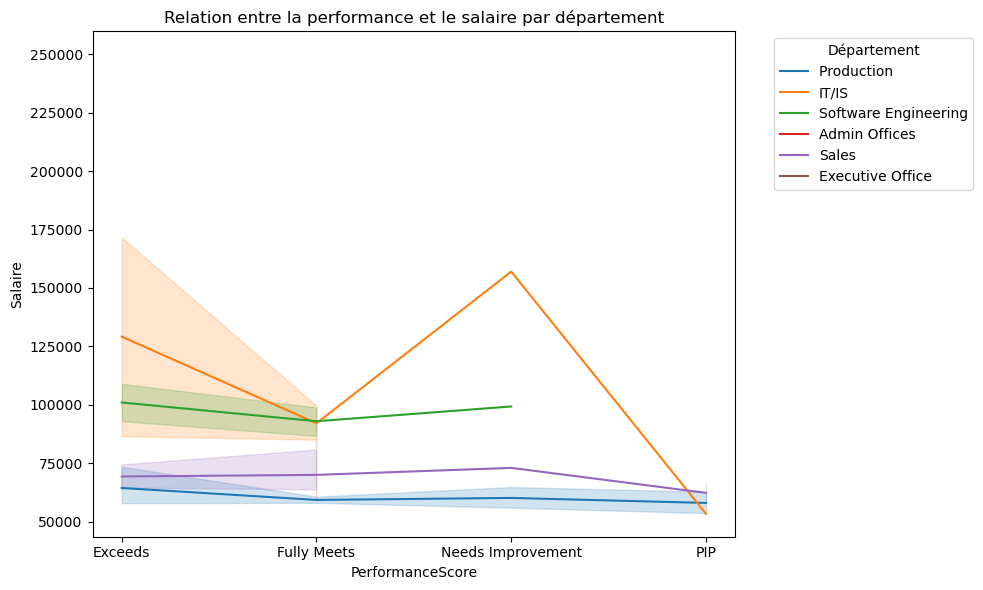

In [26]:

plt.figure(figsize=(10, 6))
sns.lineplot(x="PerformanceScore", y="Salary", hue="Department", data=df)

plt.title('Relation entre la performance et le salaire par département')
plt.xlabel('PerformanceScore')
plt.ylabel('Salaire')

plt.legend(title='Département', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


#### D'après le graphique précédent, nous pouvons conclure que dans les départements de la production et de la vente le salaire dépends de la performance alors qu'au niveau de celui de systeme d'information (IT/IS), même ce qui ne sont pas bien performant touche un bon salaire que ceux qui sont bons.

<AxesSubplot:xlabel='EmpSatisfaction', ylabel='Salary'>

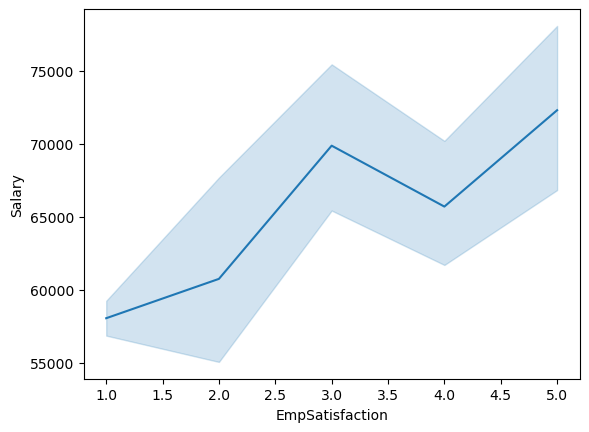

In [147]:
sns.lineplot(x = "EmpSatisfaction", y = "Salary", data = df)

####  Plus le salaire est élevé, plus les employés sont satisfaits du boulot.

<AxesSubplot:xlabel='Department', ylabel='EmpSatisfaction'>

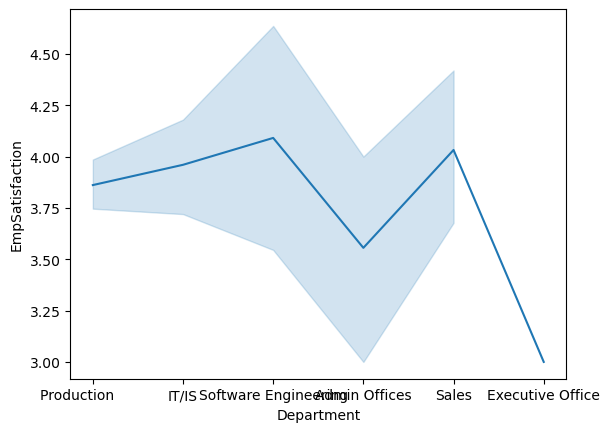

In [148]:
sns.lineplot(x = "Department", y = "EmpSatisfaction", data = df)

#### Les employés des départements informatiques semblent être les plus satisfaits, peut-être en raison de la tranquillité d'esprit qu'ils éprouvent par rapport à leurs collègues des départements de production et de vente. Ces derniers semblent être sous pression en raison de problèmes de salaire et de qualité de vie. En revanche, les employés des départements administratifs et du bureau exécutif ne sont pas forcément satisfaits du travail réalisé par leurs collègues ou du rendement de l'entreprise.

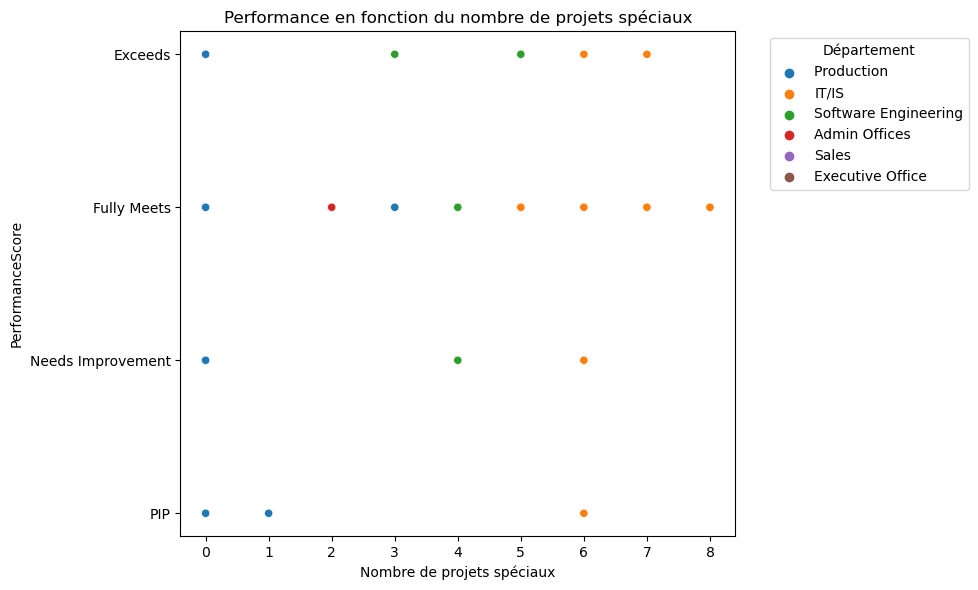

In [29]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x="SpecialProjectsCount", y="PerformanceScore", hue="Department", data=df)

plt.title('Performance en fonction du nombre de projets spéciaux')
plt.xlabel('Nombre de projets spéciaux')
plt.ylabel('PerformanceScore')

plt.legend(title='Département', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


#### Les employés du service informatique font plus de projets spéciaux que les autres, surtout ceux de la production où les tâches sont souvent répétitives. Les employés qui ont de bonnes performance également ont souvent travaillé sur des projets spéciaux.

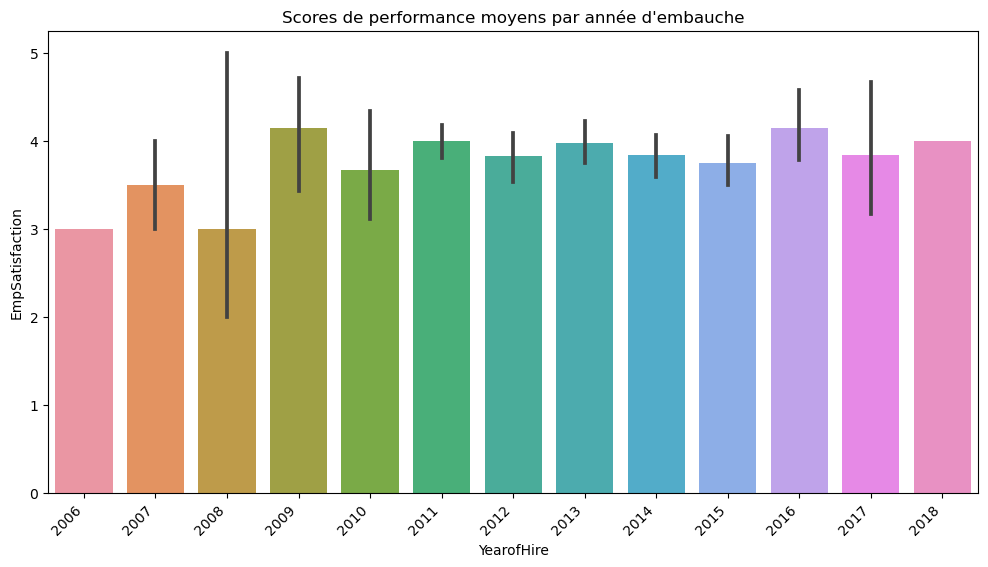

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='YearofHire', y='EmpSatisfaction', data=df1, estimator=np.mean)
plt.title('Scores de performance moyens par année d\'embauche')
plt.xticks(rotation=45, ha='right')
plt.show()


#### La satisfaction est un peu plus bonne pour les années 2009, 2011 et 2016.Au niveau de 2008 on remarque les valeurs aberrantes.

In [49]:
df_numeric.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Year_Of_Birth,Year_Of_B,LastPerformanceReview_Year,YearofHire
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,...,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942,2003.993569,2003.993569,2017.569132,2012.688103
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,...,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596,36.745330,36.745330,2.328133,1.956582
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,...,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000,1974.000000,1974.000000,2010.000000,2006.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,...,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000,1981.000000,1981.000000,2016.000000,2011.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,...,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000,1986.000000,1986.000000,2019.000000,2013.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,...,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000,2051.000000,2051.000000,2019.000000,2014.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,...,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000,2073.000000,2073.000000,2019.000000,2018.000000


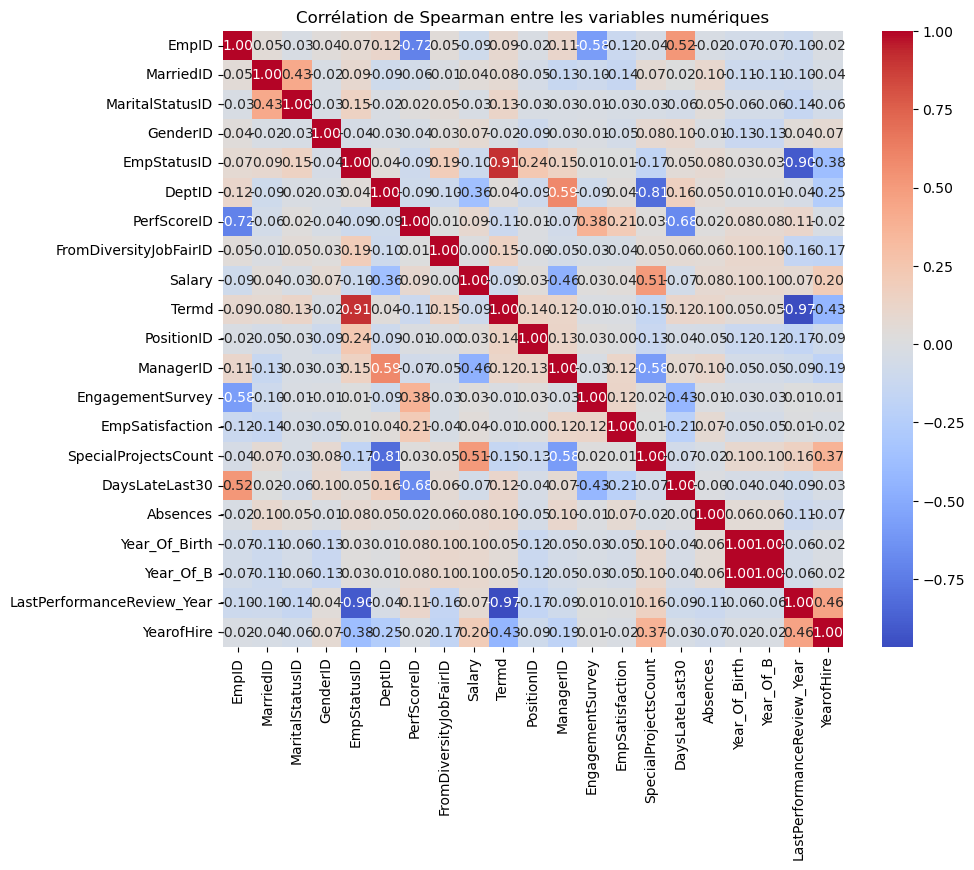

In [48]:

# Sélectionnons les colonnes numériques 
df_numeric = df1.select_dtypes(include=[np.number])

# Supprimons les colonnes "Zip"  du DataFrame
df_numeric.drop(columns=['Zip'], inplace=True)

# Calculons la corrélation de Spearman
correlation_spearman = df_numeric.corr(method='spearman')

# Tracé de  la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation de Spearman entre les variables numériques')
plt.show()



#### Les carrés bleus indiquent des corrélations négatives tandis que plus la couleur tend vers le rouge plus la corrélation est forte.

#### L'ancienneté représenté par la variable EmpStatusID a une corrélation positive forte avec la plupart des indicateurs de performance, en particulier PerformanceScore et EngagementSurvey. Cela suggère que les employés ayant une plus longue ancienneté ont tendance à mieux performer et à être plus engagés. 

#### Quant à la variable "Department", il a également une corrélation positive modérée avec le salaire, indiquant que les employés dans les départements mieux rémunérés peuvent performer légèrement mieux.  ManagerID a une corrélation positive modérée avec PerformanceScore et EngagementSurvey, suggérant que les employés avec des managers de niveau supérieur peuvent mieux performer et être plus engagés.

#### L'année d'embauche représenté par "YearofHire" a une corrélation négative faible avec PerformanceScore, suggérant que les employés plus âgés peuvent performer légèrement moins bien. Cependant, il a une corrélation positive faible avec le salaire, indiquant que les employés plus âgés peuvent gagner légèrement plus.
